# Анализ программы лояльности

# Ход анализа:

Перед проведением анализа необходимо проверить данные на ошибки и провести оценку их влияния на исследование.

**Исследование пройдет в 8 этапов:**

- Изучение общей информации о данных
- Предобработка данных
- Исследовательский анализ данных
- Анализ программы лояльности
- Проверка статистических гипотез
- Общий вывод
- Рекомендации
- Презентация исследования

##  1 Откроем файлы с данными и изучим общую информацию

### 1.1 Импортируем необходимые библиотеки. Считаем данные из csv-файла в датафрейм и сохраним в переменные

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy import stats
import math as mth
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt
from datetime import datetime, timedelta # импортируем необходимые библиотеки 

In [2]:
retail_dataset = pd.read_csv('.csv') # читаем csv-файл
product_codes = pd.read_csv ('.csv') # читаем csv-файл

### 1.2 Изучим общую информацию о данных датафрейма retail_dataset

In [3]:
display(retail_dataset.info()) # Общая информация о датафрейме
display(retail_dataset.head()) # Посмотрим первые строки датафрейма
display(retail_dataset.tail()) # Посмотрим на последние строки датафрейма 
display(retail_dataset.sample(5)) # Посмотрим на рандомные выборки из датафрейма
display(retail_dataset.describe()) # Посмотрим на статистику по всем числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   purchaseid       105335 non-null  object 
 1   item_ID          105335 non-null  object 
 2   Quantity         105335 non-null  int64  
 3   purchasedate     105335 non-null  object 
 4   CustomerID       69125 non-null   float64
 5   ShopID           105335 non-null  object 
 6   loyalty_program  105335 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


None

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
105330,538566,21826,1,2016-12-13 11:21:00,NaN,Shop 0,0.0
105331,540247,21742,0,2017-01-05 15:56:00,21143.0,Shop 0,0.0
105332,538068,85048,1,2016-12-09 14:05:00,23657.0,Shop 0,1.0
105333,538207,22818,11,2016-12-10 11:33:00,18427.0,Shop 0,0.0
105334,543977,22384,9,2017-02-14 15:35:00,21294.0,Shop 0,0.0


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
29681,537141,22111,4,2016-12-05 12:57:00,21249.0,Shop 0,0.0
76321,540813,22508,1,2017-01-11 12:41:00,20348.0,Shop 0,0.0
10806,537772,22080,4,2016-12-08 12:35:00,23722.0,Shop 0,1.0
24792,544599,21539,0,2017-02-21 18:15:00,NaN,Shop 0,0.0
64859,537237,20622,0,2016-12-06 09:58:00,NaN,Shop 0,0.0


,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


### 1.3 Изучим общую информацию о данных датафрейма product_codes

In [4]:
display(product_codes.info()) # Общая информация о датафрейме
display(product_codes.head()) # Посмотрим первые строки датафрейма
display(product_codes.describe()) # Посмотрим на статистику по всем числовым столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productID      9969 non-null   object 
 1   price_per_one  9969 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


None

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


### Вывод

Датасеты требуются в предобработке.

**В датасете retail_dataset необходимо:**

1. Заменить типы данных в столбцах:

- purchasedate (дата покупки) на datetime
- CustomerID (id покупателя) на int
- loyalty_program (программа лояльности) на int

2. Привести названия столбцов к единому стилю
3. Заполнить пропущенные значения (проанализировать возможности для заполнения пропущенных значений в столбце customer_id)
4. Проверить данные на дубликаты
5. Обработать аномальные значения в столбце Quantity (количество товара)

**В датасете product_codes необходимо:**

- Привести названия столбцов к единому стилю

## 2 Предобработка данных 

### 2.1 Исправим названия столбцов

In [5]:
retail_dataset.columns = retail_dataset.columns.str.lower()
product_codes.columns = product_codes.columns.str.lower() # Приведем названия столбцов к нижнему регистру

retail_dataset = (retail_dataset.rename(columns={
                         'purchaseid':'purchase_id', 
                         'purchasedate':'purchase_date', 
                         'customerid':'customer_id',
                         'shopid': 'shop_id'})) # Заменим название столбцов

product_codes = (product_codes.rename(columns={
                         'productid':'item_id'})) # Заменим название столбцов

display(retail_dataset.columns)
display(product_codes.columns) # Проверим 

Index(['purchase_id', 'item_id', 'quantity', 'purchase_date', 'customer_id',
       'shop_id', 'loyalty_program'],
      dtype='object')

Index(['item_id', 'price_per_one'], dtype='object')

### 2.2 Изменим типы данных в столбцах

In [6]:
retail_dataset['purchase_date'] = pd.to_datetime(retail_dataset['purchase_date'], format='%Y-%m-%dT')
retail_dataset['loyalty_program'] = (retail_dataset['loyalty_program']
                                     .astype('int32')) # Изменим тип данных в столбцах
retail_dataset.info() # Проверим 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   purchase_id      105335 non-null  object        
 1   item_id          105335 non-null  object        
 2   quantity         105335 non-null  int64         
 3   purchase_date    105335 non-null  datetime64[ns]
 4   customer_id      69125 non-null   float64       
 5   shop_id          105335 non-null  object        
 6   loyalty_program  105335 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(3)
memory usage: 5.2+ MB


Тип данных в столбце customer_id заменим после заполнения пропусков. 

### 2.3 Поиск и заполнение пропущенных значений в столбцах

In [7]:
display(retail_dataset.isna().sum().sort_values()) # Количество пропущенных значений в столбцах
retail_dataset.isna().mean()*100 # Доля пропущенных значений 

purchase_id            0
item_id                0
quantity               0
purchase_date          0
shop_id                0
loyalty_program        0
customer_id        36210
dtype: int64

purchase_id         0.000000
item_id             0.000000
quantity            0.000000
purchase_date       0.000000
customer_id        34.376038
shop_id             0.000000
loyalty_program     0.000000
dtype: float64

36210 (35%) пропущенных значений в стобце customer_id датасета retail_dataset. Такое количество данных удалить не можем. Попробуем заполнить пропущенные значения.

Проверим, есть ли в датасете с пропусками участники программы лояльности.

In [8]:
i = retail_dataset[retail_dataset['customer_id'].isna()]
i.head() # Создадим датасет с пропущенными значениями

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program
6,540468,22189,0,2017-01-07 13:55:00,NaN,Shop 0,0
7,541424,79321,1,2017-01-17 17:57:00,NaN,Shop 0,0
8,538883,22891,0,2016-12-14 15:56:00,NaN,Shop 0,0
11,541696,22197,4,2017-01-20 18:08:00,NaN,Shop 0,0
16,539744,22300,5,2016-12-21 15:21:00,NaN,Shop 0,0


In [9]:
i.query('loyalty_program == 1') # Делаем срез

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program


Участников программ лояльности среди покупателей с пропущенными значениями нет. 

Проверим, в каких магазинах производилась покупка.

In [10]:
i['shop_id'].unique() # Найдем уникальные значения магазинов

array(['Shop 0', 'Shop 25', 'Shop 6', 'Shop 21', 'Shop 23'], dtype=object)

In [11]:
(i.groupby('shop_id')['purchase_id'].count()
              .sort_values(ascending=False)
              .reset_index()) # Группируем по магазинам

,shop_id,purchase_id
0,Shop 0,36009
1,Shop 6,128
2,Shop 25,57
3,Shop 21,14
4,Shop 23,2


Практически все покупатели, у которых пропущены id, закупались у магазина 'Shop_0'. 


Скорее всего это покупатели, которые впервые зашли в магазин и приобрели товары, поэтому в базе данных клиентов их нет. Также возможно, что при покупке товара случился технический сбой. В любом случае удалять пропущенные значения не будем, заменим все пропущенные значения на 0. 

In [12]:
retail_dataset['customer_id'] = retail_dataset['customer_id'].fillna(0) # Заменю все пропуски на 0 

In [13]:
retail_dataset['customer_id'] = retail_dataset['customer_id'].astype('int32')
# Заменю тип данных в столбце, после заполнения пропусков

### 2.4 Поиск дубликатов

In [14]:
display(retail_dataset.duplicated().sum())
display(product_codes.duplicated().sum()) # Наличие дубликатов

1033

0

В датасете retail_dataset выявлено 1033 дубликатов. В условиях, описанных заказчиком проекта, говорится о чеках, в которых могут быть отдельные записи для одного и того же товара. Удалять дубликаты не будем.

### 2.5 Обработка аномальных значений

In [15]:
retail_dataset['quantity'] = retail_dataset['quantity'].abs()
retail_dataset['quantity'].describe()

count    105335.000000
mean         10.093245
std         327.884632
min           0.000000
25%           0.000000
50%           2.000000
75%           8.000000
max       74216.000000
Name: quantity, dtype: float64

Отрицательные значения убрали

### Вывод:

**В рамках предобработки данных:**

- Привели названия столбцов в датасетах к единому стилю;
- Изменили типы данных;
- Выявили и заполнили пропущенные значения в данных;
- Выявили и оставили дубликаты;
- Обработали аномальные значения в данных.

## 3 Исследовательский анализ данных

### 3.1 Объединим датасеты retail_dataset и product_codes

В таблице с ценами (product_codes), для некоторыех товаров указано несколько цен. Для следующих расчетов расчитаем среднюю цену таких товаров.

In [16]:
product_codes_new = (product_codes
                     .groupby('item_id')['price_per_one']
                     .mean()
                     .reset_index())

product_codes_new.head() # Сгруппируем таблицу product_codes и заменим цены на среднее значение

,item_id,price_per_one
0,10002,1.38
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


In [17]:
df = retail_dataset.merge(product_codes_new, on= 'item_id').sort_values(by='purchase_date')
df.head() # Объединяем датасеты по столбцу item_id (id товара) и сохраним в переменную df

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one
97691,536365,21730,5,2016-12-01 08:26:00,23529,Shop 0,1,7.332500
8280,536365,85123A,5,2016-12-01 08:26:00,23529,Shop 0,1,3.406667
16061,536365,84029E,5,2016-12-01 08:26:00,23529,Shop 0,1,5.241250
18590,536365,84406B,7,2016-12-01 08:26:00,23529,Shop 0,1,4.253000
72474,536365,71053,5,2016-12-01 08:26:00,23529,Shop 0,1,5.975000


### 3.2 Создадим столбец с общей суммой покупок 

In [18]:
df['total_price'] = df['quantity'] * df['price_per_one']
df.head() # Умножим количество товара на стоимость одной единицы товара

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,total_price
97691,536365,21730,5,2016-12-01 08:26:00,23529,Shop 0,1,7.332500,36.662500
8280,536365,85123A,5,2016-12-01 08:26:00,23529,Shop 0,1,3.406667,17.033333
16061,536365,84029E,5,2016-12-01 08:26:00,23529,Shop 0,1,5.241250,26.206250
18590,536365,84406B,7,2016-12-01 08:26:00,23529,Shop 0,1,4.253000,29.771000
72474,536365,71053,5,2016-12-01 08:26:00,23529,Shop 0,1,5.975000,29.875000


### 3.3 Создадим столбец с днем покупок

In [19]:
df['purchase_day'] = df['purchase_date'].dt.date # Добавим в таблицу столбец с днем 
df.head()

,purchase_id,item_id,quantity,purchase_date,customer_id,shop_id,loyalty_program,price_per_one,total_price,purchase_day
97691,536365,21730,5,2016-12-01 08:26:00,23529,Shop 0,1,7.332500,36.662500,2016-12-01
8280,536365,85123A,5,2016-12-01 08:26:00,23529,Shop 0,1,3.406667,17.033333,2016-12-01
16061,536365,84029E,5,2016-12-01 08:26:00,23529,Shop 0,1,5.241250,26.206250,2016-12-01
18590,536365,84406B,7,2016-12-01 08:26:00,23529,Shop 0,1,4.253000,29.771000,2016-12-01
72474,536365,71053,5,2016-12-01 08:26:00,23529,Shop 0,1,5.975000,29.875000,2016-12-01


### 3.4 Максимальная и минимальная дата

In [20]:
max_date = df['purchase_date'].max()
min_date = df['purchase_date'].min() # Найдем максимальную и минимальную дату
display(max_date)
min_date

Timestamp('2017-02-28 17:04:00')

Timestamp('2016-12-01 08:26:00')

**Вывод:**

Данные представлены за период с 01 декабря 2016 года по 28 февраля 2017 года

### 3.5 Количество покупок по дням 

In [21]:
number_of_purchases = (df.groupby('purchase_day')['purchase_id']
                       .nunique()
                       .reset_index() # Количество уникальных покупок по дням 
                       )
number_of_purchases

,purchase_day,purchase_id
0,2016-12-01,143
1,2016-12-02,167
2,2016-12-03,108
3,2016-12-05,95
4,2016-12-06,133
...,...,...
63,2017-02-23,68
64,2017-02-24,66
65,2017-02-25,51
66,2017-02-27,35


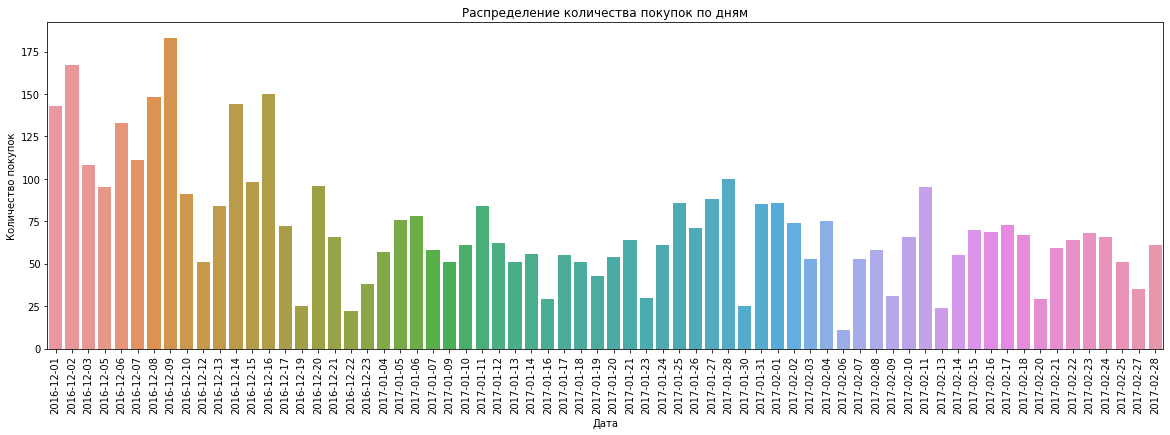

In [22]:
plt.figure(figsize=(20, 6)) # Установим размер графика

sns.barplot(x= 'purchase_day', y= 'purchase_id', data = number_of_purchases) # Строим график

plt.title('Распределение количества покупок по дням') # Подпишем график
plt.xlabel('Дата')
plt.ylabel('Количество покупок')
plt.xticks(rotation=90) # Повернем надписи по осе x
plt.show()

**Вывод:**

По графику видим, что в период новогодних праздиков (с 24 декабря по 4 января) покупки отсутствуют. В декабре 2016 года наблюдается большее количество покупок, чем в январе и феврале 2017 года.

### 3.6 Изобразим соотношение покупателей, участвующих и не участвующих в программе лояльности

In [23]:
customer_ratio = df.groupby ('loyalty_program').agg({'customer_id': 'nunique'}).reset_index()
customer_ratio # Группируем по программе и посчитаем уникальных покупателей 

,loyalty_program,customer_id
0,0,1163
1,1,587


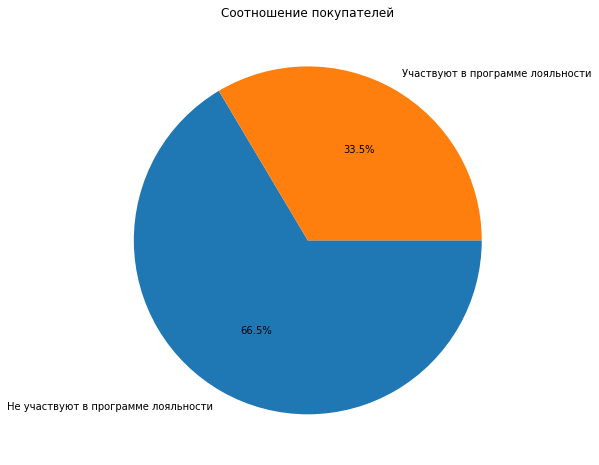

In [24]:
plt.figure(figsize = (10, 8)) # Установим размер диаграммы 

plt.pie(customer_ratio.customer_id, labels=customer_ratio.loyalty_program # Создаем круговую диаграмму
        .map({0: 'Не участвуют в программе лояльности', 1: 'Участвуют в программе лояльности'})
        , autopct='%1.1f%%', counterclock=False) # Подпишем доли 

plt.title('Соотношение покупателей') # Подпишем график
plt.show()

**Вывод:**

66,5% покупателей не участвуют в программе лояльности

### 3.7 Общий доход магазинов за весь временной период

In [25]:
stores_income = (df.groupby('shop_id')
                      .agg({'total_price':'sum'})
                      .sort_values(by = 'total_price', ascending=False)
                      .reset_index())

stores_income # Посчитаем общий доход магазинов

,shop_id,total_price
0,Shop 0,2.555613e+06
1,Shop 3,1.042184e+05
2,Shop 6,6.938536e+04
3,Shop 4,5.821713e+04
4,Shop 1,4.886814e+04
5,Shop 2,4.086284e+04
6,Shop 14,2.318652e+04
7,Shop 8,1.854239e+04
8,Shop 19,1.167662e+04
9,Shop 7,1.118132e+04


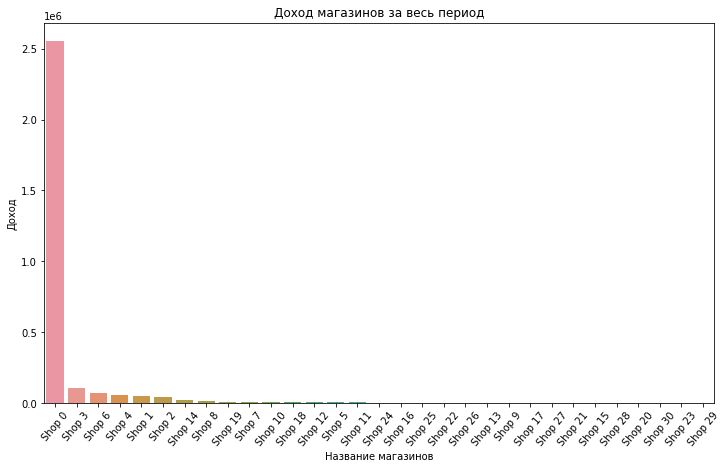

In [26]:
plt.figure(figsize=(12, 7)) # Установим размер графика

sns.barplot(x= 'shop_id', y= 'total_price', data = stores_income) # Строим график

plt.title('Доход магазинов за весь период') # Подпишем график
plt.xlabel('Название магазинов')
plt.ylabel('Доход')
plt.xticks(rotation=50) # Повернем надписи по осе x
plt.show()

**Вывод:**

Общий доход за весь временной период сильно выделяется только у одного магазина - Shop 0. Как видно на графике, у остальных магазинов доход за три месяца крайне низкий, если сравнивать их с магазином Shop 0. 

### 3.8 Средний чек по магазинам 

In [27]:
shop_mean = (df.groupby('shop_id')
                      .agg({'total_price':'mean'})
                      .sort_values(by = 'total_price', ascending=False)
                      .reset_index())

shop_mean # Средний чек по магазинам

,shop_id,total_price
0,Shop 23,297.540000
1,Shop 3,211.825928
2,Shop 2,161.513221
3,Shop 19,157.792156
4,Shop 14,150.561816
5,Shop 24,122.432826
6,Shop 22,72.674036
7,Shop 13,69.811419
8,Shop 6,67.233876
9,Shop 16,65.672884


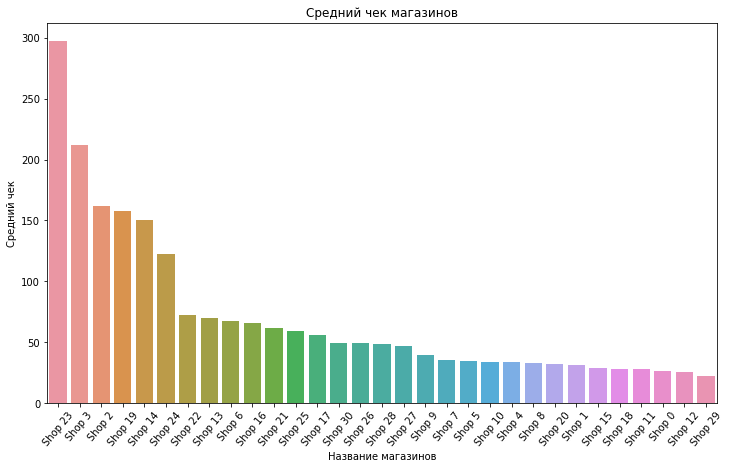

In [28]:
plt.figure(figsize=(12, 7)) # Установим размер графика

sns.barplot(x='shop_id', y='total_price', data=shop_mean) # Строим график
plt.title('Средний чек магазинов') # Подпишем график
plt.xlabel('Название магазинов')
plt.ylabel('Средний чек')
plt.xticks(rotation=50) # Повернем надписи на осе x
plt.show()

**Вывод:**

Самый высокий средний чек у магазинов под № 23, 3, 14, 2, 19, 24.

Самый низкий средний чек у магазинов под № 15, 12,29.

### 3.9 Общее количество покупателей у каждого магазина

In [29]:
total_customer = (df.groupby('shop_id')
                      .agg({'customer_id': 'nunique'})
                      .sort_values(by = 'customer_id', ascending=False)
                      .reset_index())

total_customer # Общее количество покупателей у каждого магазина

,shop_id,customer_id
0,Shop 0,1573
1,Shop 4,43
2,Shop 1,38
3,Shop 8,12
4,Shop 12,10
5,Shop 10,8
6,Shop 2,8
7,Shop 11,7
8,Shop 7,7
9,Shop 18,5


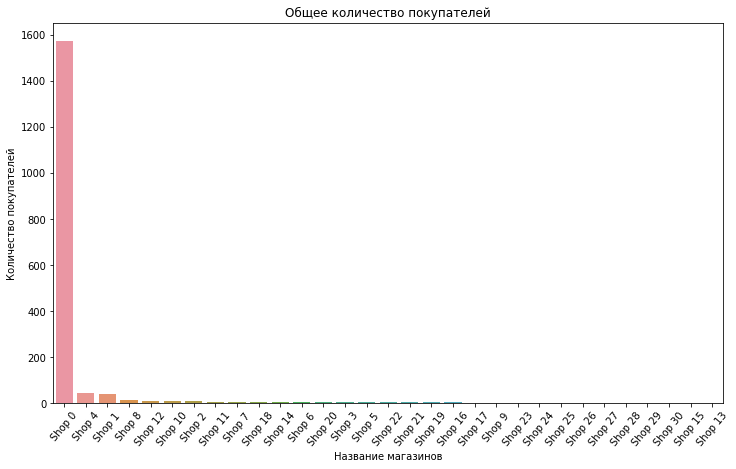

In [30]:
plt.figure(figsize=(12, 7)) # Установим размер графика

sns.barplot(x='shop_id', y='customer_id', data=total_customer) # Строим график

plt.title('Общее количество покупателей') # Подпишем график
plt.xlabel('Название магазинов')
plt.ylabel('Количество покупателей')
plt.xticks(rotation=50) # Повернем надписи на осе x
plt.show()

**Вывод:**

На графике видим, что абсолютный лидер по количеству покупателей магазин - Shop 0.

### 3.10 Общее количество покупок в магазинах

In [31]:
total_purchase = (df.groupby('shop_id')
                      .agg({'purchase_id':'count'})
                      .sort_values(by = 'purchase_id', ascending=False)
                      .reset_index())

total_purchase # 

,shop_id,purchase_id
0,Shop 0,97393
1,Shop 4,1741
2,Shop 1,1540
3,Shop 6,1032
4,Shop 8,560
5,Shop 3,492
6,Shop 7,312
7,Shop 10,299
8,Shop 12,278
9,Shop 18,256


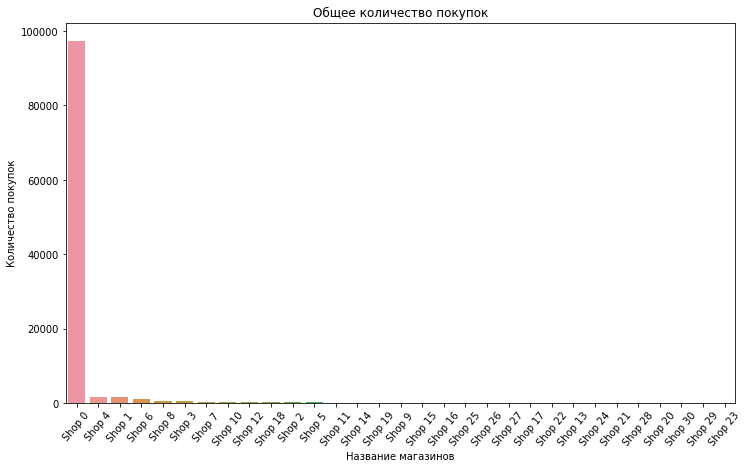

In [32]:
plt.figure(figsize=(12, 7)) # Установим размер графика

sns.barplot(x='shop_id', y='purchase_id', data=total_purchase) # Строим график

plt.title('Общее количество покупок') # Подпишем график
plt.xlabel('Название магазинов')
plt.ylabel('Количество покупок')
plt.xticks(rotation=50) # Повернем надписи на осе x
plt.show()

**Вывод:**

Практически все покупатели, которые представлены в датасете совершали покупки в магазине Shop 0 (466757 покупок). В остальных магазинах количество покупок варьируется в пределах от 6 до 8654. 

### 3.11 Количество покупок на одного клиента

In [33]:
purchases = (df.groupby('shop_id')
             .agg({'customer_id' : 'nunique', 'purchase_id' : 'nunique'})
             .reset_index()) # Группируем по магазину уникальных покупателей и покупки

purchases['purchases_per_customer'] = purchases['purchase_id'] / purchases['customer_id']
# Расчитаем количество покупок на клиента, разделив покупки на уникальных покупателей

purchases = purchases.sort_values(by = 'purchases_per_customer', ascending=False) 
# Сортируем по количеству покупок на одного клиента

purchases

,shop_id,customer_id,purchase_id,purchases_per_customer
27,Shop 6,4,46,11.500000
5,Shop 13,1,4,4.000000
23,Shop 3,4,15,3.750000
0,Shop 0,1573,4471,2.842339
25,Shop 4,43,114,2.651163
12,Shop 2,8,19,2.375000
1,Shop 1,38,90,2.368421
11,Shop 19,3,7,2.333333
4,Shop 12,10,21,2.100000
16,Shop 23,1,2,2.000000


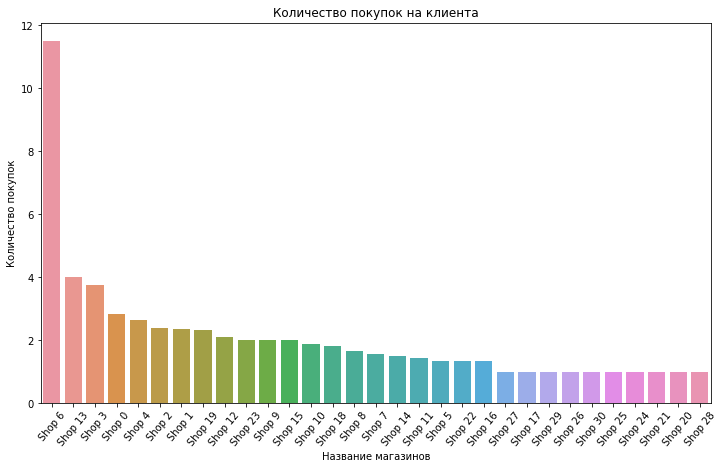

In [34]:
plt.figure(figsize=(12, 7)) # Установим размер графика

sns.barplot(x= 'shop_id', y= 'purchases_per_customer', data= purchases) # Строим график

plt.title('Количество покупок на клиента') # Подпишем график
plt.xlabel('Название магазинов')
plt.ylabel('Количество покупок')
plt.xticks(rotation=50) # Повернем надписи на осе x
plt.show()

**Вывод:**

Сильно выделяеться магазин под № 6 (11,5 покупок на клиента). 

В остальных магазинах один покупатель совершает не более 4 покупок. 

### Вывод

**Результаты исследования:**

1. Данные о покупках в магазине строительных материалов представлены с 01 декабря 2016 года по 28 февраля 2017 года.
2. 33,5% покупателей участвуют в программе лояльности.
3. Практически все покупки совершались в магазине Shop 0. Самая высокая выручка и лидер по количество уникальных покупателей, также магазин Shop 0.
4. Самый высокий средний чек у магазинов под № 23, 3, 14, 2, 19, 24.
5. У магазина под №6 самый высокий показатель по количеству покупок на клиента (более 11 покупок на клиента). В остальных магазинах один покупатель совершает не более 4 покупок.

## 4 Анализ программы лояльности

### 4.1 Динамика покупок по дням

In [35]:
df_cus = df[df['customer_id'] != 0] # Уберем 0-го покупателя 

In [36]:
purchases_by_day = (df_cus.groupby(['loyalty_program', 'purchase_day'])
                     .agg({'purchase_id' : 'nunique', 'customer_id' : 'nunique'})
                     .reset_index()) 
# Группируем по дате и участию в программе лоялности, считаем количество покупок и покупателей

purchases_by_day.head()

,loyalty_program,purchase_day,purchase_id,customer_id
0,0,2016-12-01,78,62
1,0,2016-12-02,94,81
2,0,2016-12-03,39,35
3,0,2016-12-05,68,51
4,0,2016-12-06,67,51


Получили датасет с количеством покупок и покупателей по дням за три месяца с разделением по программе лояльности.

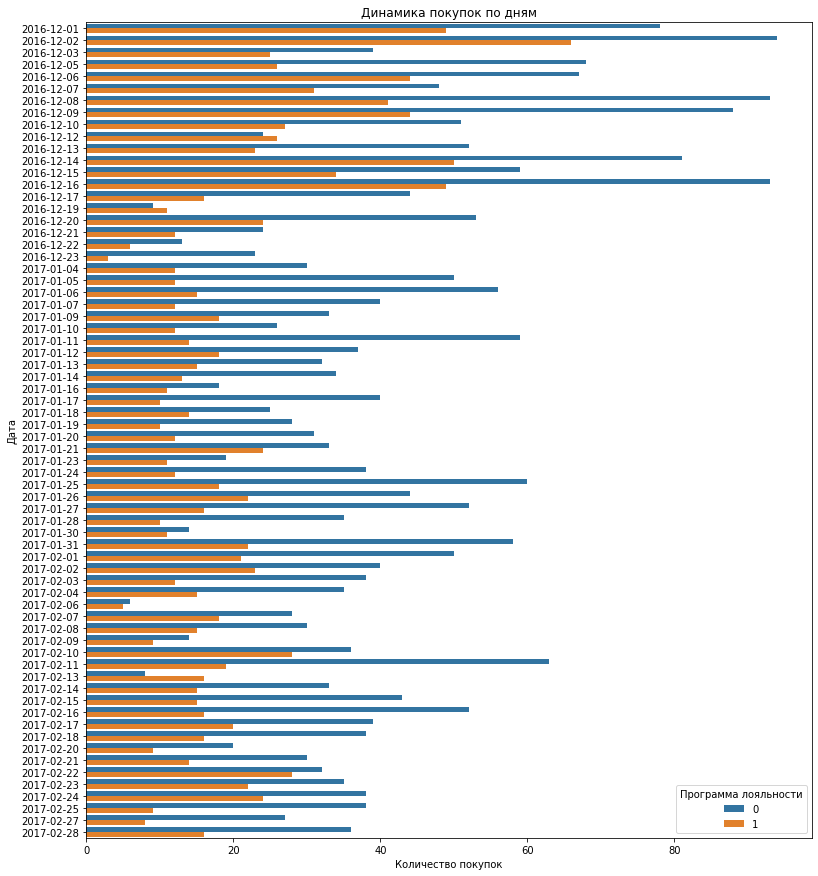

In [37]:
plt.figure(figsize=(13, 15)) 

sns.barplot(x='purchase_id', y='purchase_day', hue = 'loyalty_program', data = purchases_by_day)

plt.title('Динамика покупок по дням')
plt.xlabel('Количество покупок')
plt.ylabel('Дата')
plt.legend(title='Программа лояльности') 
plt.show()

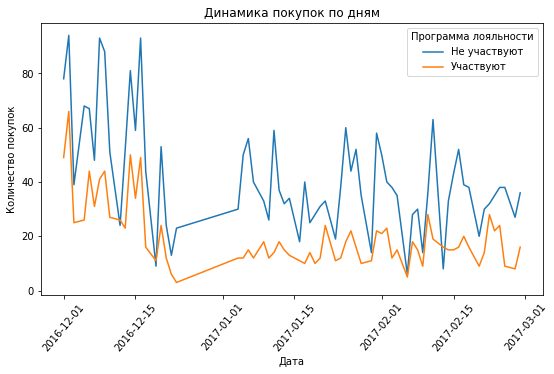

In [38]:
plt.figure(figsize=(9, 5)) 

sns.lineplot(x='purchase_day', y='purchase_id', hue = 'loyalty_program', data = purchases_by_day)

plt.title('Динамика покупок по дням')
plt.xlabel('Дата')
plt.ylabel('Количество покупок')
plt.legend(['Не участвуют','Участвуют'], title='Программа лояльности')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

На графиках выше видим, что количество покупок у покупателей, которые не участвуют в программе лояльности больше, чем у покупателей, участвующих в программе лояльности. Это связано с тем, что клиентов с программой лояльности значительно меньше. 

На втором графике у клиентов, которые не участвуют в программе наблюдается сильная волотильность в количестве покупок, в отличии от клиентов, которые участвуют.

### 4.2 Относительное количество покупок на клиента по дням

Создадим столбец с отностительным количеством покупок. Разделим общее количество покупок на количество покупателей.

In [39]:
purchases_by_day['purchases_per_customer'] = (purchases_by_day['purchase_id'] 
                                               / purchases_by_day['customer_id'])
# Делим количество покупок на количество клиентов

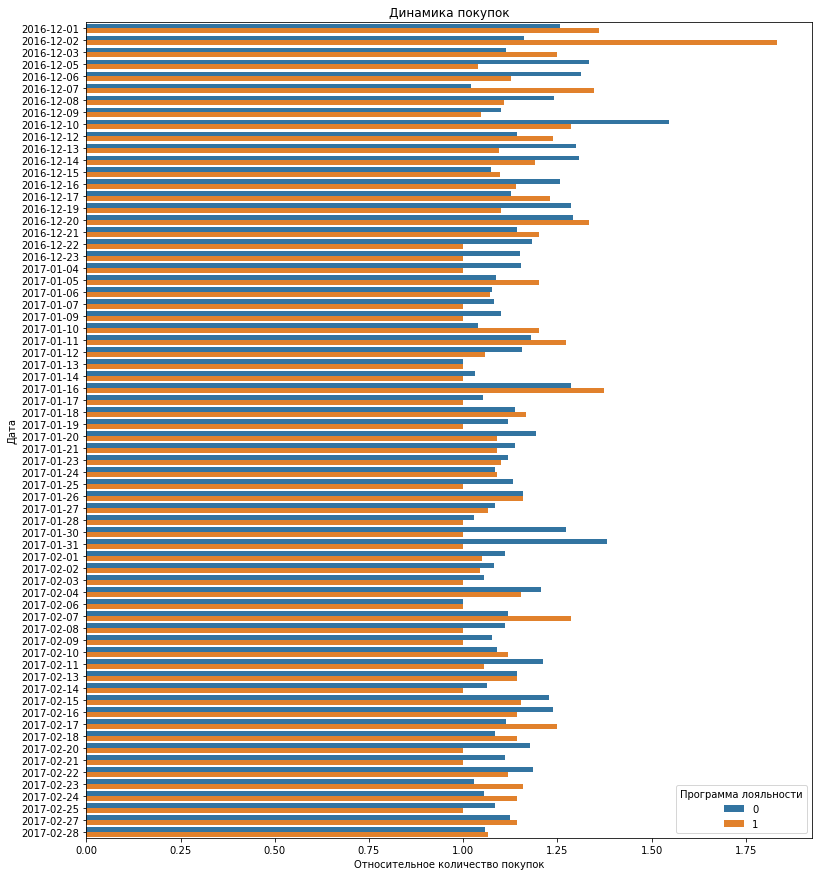

In [40]:
plt.figure(figsize=(13, 15)) 

sns.barplot(x='purchases_per_customer', y='purchase_day', hue = 'loyalty_program', data = purchases_by_day)

plt.title('Динамика покупок')
plt.xlabel('Относительное количество покупок')
plt.ylabel('Дата')
plt.legend(title='Программа лояльности') 
plt.show()

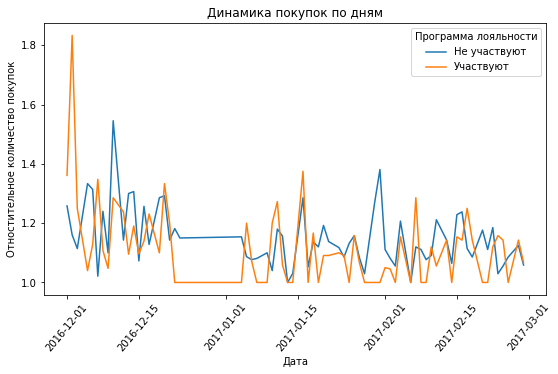

In [41]:
plt.figure(figsize=(9, 5)) 

sns.lineplot(x='purchase_day', y='purchases_per_customer', hue = 'loyalty_program', data=purchases_by_day)

plt.title('Динамика покупок по дням')
plt.xlabel('Дата')
plt.ylabel('Отностительное количество покупок')
plt.legend(['Не участвуют','Участвуют'], title='Программа лояльности')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

На графиках видим, что покупатели не участвующие в программе лояльности покупают чаще, чем покупатели с программой лояльности. Стоит отметить, что стабильности в покупках у клиентов, не участвующих в программе лояльности, не наблюдается. На втором графике заметно, что имеются сильные выбросы в отностительном количестве покупок. Относительное количество покупок меняется в больших диапазонах.  

### 4.3 Общая сумма покупок по дням

In [42]:
income_by_day = (df_cus.groupby(['loyalty_program', 'purchase_day'])
                  .agg({'total_price': 'sum', 'customer_id': 'nunique'})
                  .reset_index()
                  .sort_values(by = 'total_price', ascending = False)) # Группируем по лояльности и дням
income_by_day['income_per_customer'] = income_by_day['total_price'] / income_by_day['customer_id']
income_by_day.sort_values (by = 'income_per_customer', ascending = False)

,loyalty_program,purchase_day,total_price,customer_id,income_per_customer
32,0,2017-01-18,164705.360548,22,7486.607298
73,1,2016-12-07,61103.255464,23,2656.663281
94,1,2017-01-11,27446.715893,11,2495.155990
29,0,2017-01-14,59857.371067,33,1813.859729
52,0,2017-02-10,59125.372192,33,1791.677945
...,...,...,...,...,...
102,1,2017-01-20,2799.043615,11,254.458510
122,1,2017-02-13,3441.012566,14,245.786612
85,1,2016-12-21,2371.092405,10,237.109240
48,0,2017-02-06,1373.679512,6,228.946585


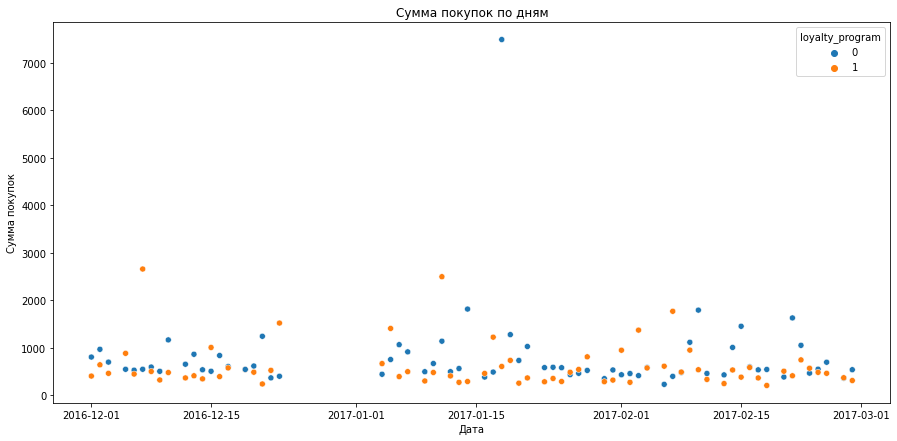

In [43]:
plt.figure(figsize=(15, 7)) # Установим размер графика

sns.scatterplot(x= 'purchase_day', y= 'income_per_customer', hue = 'loyalty_program', data=income_by_day) 
# Диаграмма рассеяния

plt.title('Сумма покупок по дням') # Подпишем график 
plt.xlabel('Дата')
plt.ylabel('Сумма покупок')
plt.show()

На диаграмме видим, что есть выборосы. Уберем покупки превышающие 3000 рублей.

In [44]:
income_by_day = income_by_day.query('income_per_customer < 3000') # Уберем аномальные значения
income_by_day['income_per_customer'].describe()

count     135.000000
mean      650.351033
std       412.089968
min       205.599142
25%       407.807986
50%       531.511984
75%       714.849635
max      2656.663281
Name: income_per_customer, dtype: float64

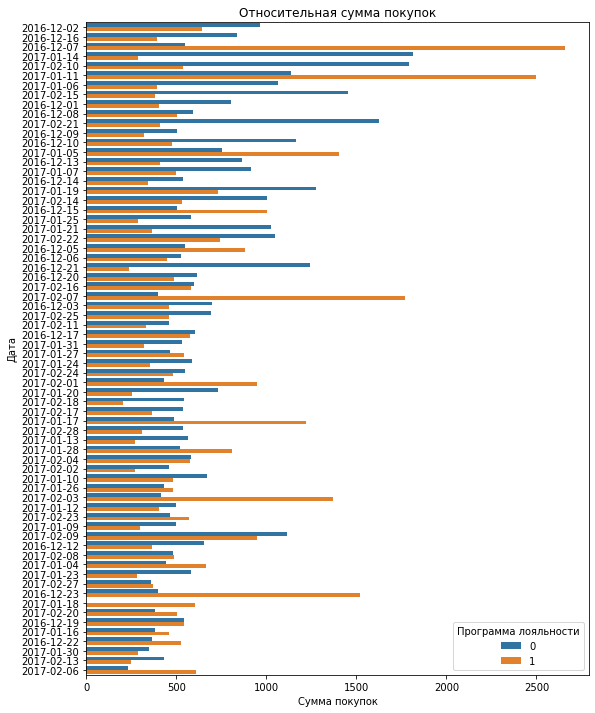

In [45]:
plt.figure(figsize=(9, 12)) 

sns.barplot(x='income_per_customer', y='purchase_day', hue = 'loyalty_program', data = income_by_day)

plt.title('Относительная сумма покупок')
plt.xlabel('Сумма покупок')
plt.ylabel('Дата')
plt.legend(title='Программа лояльности') 
plt.show()

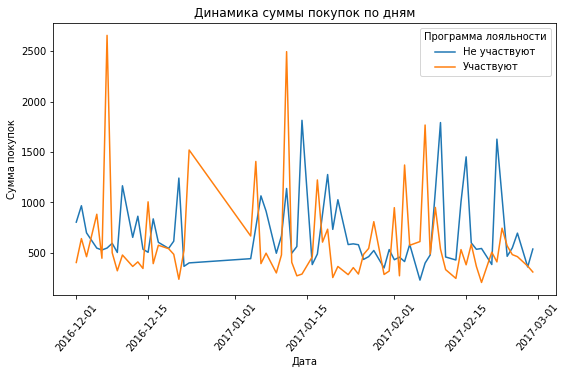

In [46]:
plt.figure(figsize=(9, 5)) 

sns.lineplot(x='purchase_day', y='income_per_customer', hue = 'loyalty_program', data=income_by_day)

plt.title('Динамика суммы покупок по дням')
plt.xlabel('Дата')
plt.ylabel('Сумма покупок')
plt.legend(['Не участвуют','Участвуют'], title='Программа лояльности')
plt.xticks(rotation=50)
plt.show()

**Вывод:**

На графиках видно, что сумма покупок клиетов обеих групп примерно одинакова.

### 4.4 Среднее количество покупок и расходов покупателей

In [47]:
mean = (df_cus.groupby('loyalty_program')
         .agg({'total_price': 'sum', 'customer_id': 'nunique', 'purchase_id': 'nunique'})
         .reset_index())
# Группируем пользователей по программе лояльности 

In [48]:
mean['number_of_purchases_mean'] = mean['purchase_id'] /  mean['customer_id']
mean.head() # Среднее значение количества покупок

,loyalty_program,total_price,customer_id,purchase_id,number_of_purchases_mean
0,0,1.851662e+06,1162,2802,2.411360
1,1,6.809017e+05,587,1344,2.289608


In [49]:
mean['consumption_mean'] = mean['total_price'] / mean['customer_id']
mean.head() # Средние расходы покупателей

,loyalty_program,total_price,customer_id,purchase_id,number_of_purchases_mean,consumption_mean
0,0,1.851662e+06,1162,2802,2.411360,1593.512591
1,1,6.809017e+05,587,1344,2.289608,1159.968815


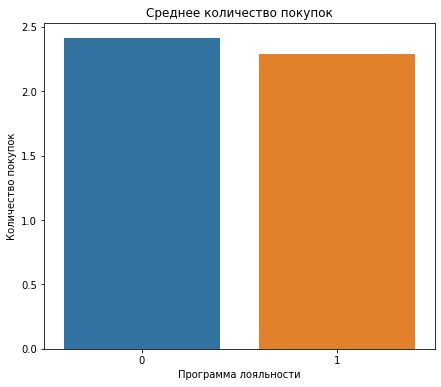

In [50]:
plt.figure(figsize=(7, 6)) 

sns.barplot(x='loyalty_program', y='number_of_purchases_mean', data = mean)

plt.title('Среднее количество покупок')
plt.xlabel('Программа лояльности')
plt.ylabel('Количество покупок')
plt.show()

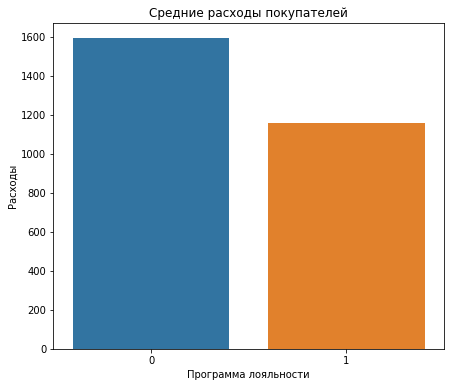

In [51]:
plt.figure(figsize=(7, 6)) 

sns.barplot(x='loyalty_program', y='consumption_mean', data = mean)

plt.title('Средние расходы покупателей')
plt.xlabel('Программа лояльности')
plt.ylabel('Расходы')
plt.show()

**Вывод:**

На основе средних значений по количеству покупок и расходов покупателей можно сделать вывод, что клиеты не участвующие в программе лояльности покупают больше товара и тратят больше, чем клиенты участвующие в программе лояльности.

### 4.5 Расчет LTV

В особенностях сбора данных указано, что оплата карты лояльности не идет через кассу,а учитывается в системе бухгалтерско-складского учета. Необходимо отобразить олату за программу лояльности при расчете LTV. Также исключим 0-го покупателя для расчета LTV.

In [52]:
df_ltv = df[df['customer_id'] != 0] # для расчета LTV исключим 0-го покупателя

In [53]:
# функция для создания пользовательских профилей
def get_profiles(df_ltv):

    # находим параметры первых посещений
    profiles = (
        df_ltv.sort_values(by=['customer_id', 'purchase_date'])
        .groupby('customer_id') # сгруппируем по id пользователя
        .agg({'purchase_date': 'first','loyalty_program':'first'}) # первые посещения
        .rename(columns={'purchase_date': 'first_ts'}) # заменим название столбца 
        .reset_index()
    )  
    
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    return profiles 

In [54]:
profiles = get_profiles (df_ltv)
profiles.head() # Получим профили пользователей 

,customer_id,first_ts,loyalty_program,dt,month
0,18025,2017-01-18 10:01:00,0,2017-01-18,2017-01-01
1,18026,2016-12-07 14:57:00,0,2016-12-07,2016-12-01
2,18027,2016-12-16 19:09:00,0,2016-12-16,2016-12-01
3,18029,2017-02-02 16:01:00,0,2017-02-02,2017-02-01
4,18031,2017-02-16 12:33:00,0,2017-02-16,2017-02-01


In [55]:
# функция для расчёта LTV 
def get_ltv(
    profiles,
    df_ltv,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query ('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        # добавляем в профили время совершения покупок и стоимость товаров в чеке
        df_ltv[['customer_id', 'purchase_date', 'total_price']], on='customer_id',how='left',
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['purchase_date'] - result_raw['first_ts']).dt.days
    
    # делаем срез на лайфтайм (32 день) и по программе лояльности 
    lp = result_raw.query ('loyalty_program == 1 and lifetime == 32')
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']
        
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df_ltv, dims, horizon_days):
        # вычисляем размеры когорт
        cohort_sizes = (
            df_ltv.groupby(dims)
            .agg({'customer_id' : 'nunique'})
            .rename(columns={'customer_id' : 'cohort_size'})
        )
    
      # строим таблицу выручки
        result = df_ltv.pivot_table(
            index=dims,
            columns='lifetime',
            values='total_price',
            aggfunc='sum')

        
        # добавим стоимость программы лояльности (200 рублей) в первый день лайфтайма
        qw = lp['customer_id'].nunique()
        
        result.loc [1,0] = ((cohort_sizes.loc [1,'cohort_size'] * 200) + result.loc [1,0])
        
        # добавим стоимость программы лояльности (200 рублей) на 32 день жизни клиента
        # в январе и декабре 31 день! 
        result.loc [1,31] = ((qw * 200) + result.loc [1,31])
        
        # считаем сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        
        # считаем LTV- делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        
        return result
    
    # получаем таблицу LTV
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # для таблицы динамики LTV убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
        
    # получаем таблицу динамики LTV
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    
    # возвращаем обе таблицы LTV и сырые данные
    return result_raw, result_grouped, result_in_time

In [56]:
observation_date = datetime(2017,2,28).date() # Момент анализа 28 февраля 2017 года

horizon_days = 60 # Определим горизонт анализа в 60 дней

In [57]:
ltv_raw, ltv, ltv_history = (get_ltv (profiles, 
                                     df_ltv, 
                                     observation_date, 
                                     horizon_days,
                                     dimensions=['loyalty_program']))
# Расчитываем LTV с помощью функции

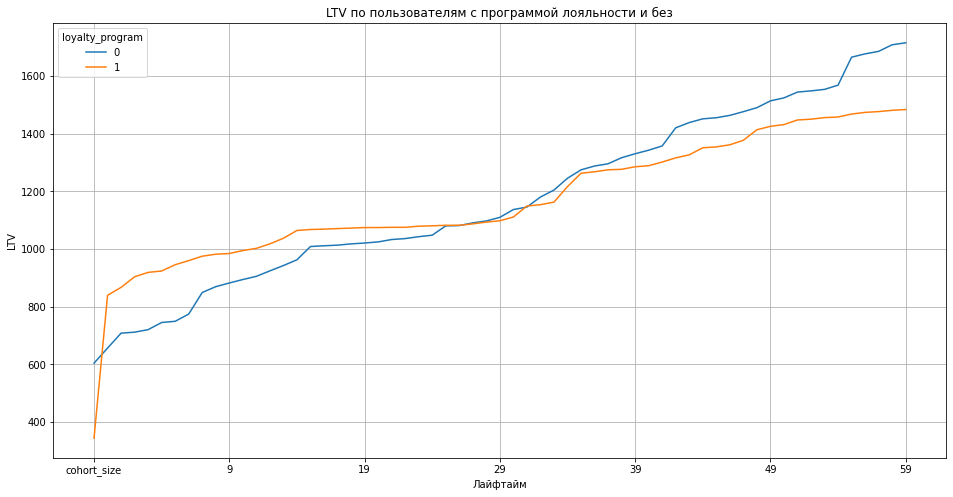

In [58]:
# Построим кривые LTV 

ltv.T.plot(figsize=(16, 8), grid=True)

plt.title('LTV по пользователям с программой лояльности и без') # Подпишем график
plt.ylabel('LTV')
plt.xlabel('Лайфтайм')

plt.show()

**Вывод:**

На графике видим, что за 60 дней LTV растет у двух категорий покупателей (с программой лояльности и без). 

В первые 30 дней показатель LTV у участников программы лояльности был выше, чем у остальных покупателей. На второй месяц ситуация меняется и LTV покупателей, не состоящих в программе лояльности становиться выше.

### Вывод

1. Покупатели, не участвующие в программе лояльности покупают чаще, чем покупатели с программой лояльности. Но стабильности в покупках клиентов без карты лояльности нет, количество покупок меняется в больших диапазонах. Клиенты с картой покупают стабильней.
2. Сумма покупок клиентов обеих групп примерно одинакова.
3. Клиеты не участвующие в программе лояльности покупают больше товара и тратят немного больше, чем клиенты участвующие в программе лояльности.
4.  В первый месяц показатель LTV у участников программы лояльности был выше, чем у остальных покупателей. На второй месяц ситуация меняется и LTV покупателей, не состоящих в программе лояльности становиться выше.

## 5 Проверка статистических гипотез 

В рамках анализа проверим две основных гипотезы:

**Гипотеза №1:** Средний чек участников программы лояльности выше, чем у остальных покупателей.

H0: Средний чек участников программы лояльности равен среднему чеку остальных покупателей.

H1: Средний чек участников программы лояльности выше, чем у остальных покупателей. 

**Гипотеза №2:** Количество покупок участников программы лояльности выше, чем у остальных покупателей.

H0: Количество покупок участников программы лояльности и остальных покупателей равно.

H1: Количество покупок участников программы лояльности выше, чем у остальных покупателей.

**Для проверки статистических гипотез воспользуемся методом Манна-Уитни и функцией stats.mannwhitneyu.**

### 5.1 Проверка гипотез

In [59]:
hypotheses = (df.groupby(['purchase_id', 'loyalty_program'])['total_price']
              .sum()
              .reset_index()) 

hypotheses.head()

,purchase_id,loyalty_program,total_price
0,536365,1,184.471417
1,536366,1,20.400000
2,536367,0,295.588750
3,536368,0,84.470000
4,536369,0,16.600000


**Гипотеза №1: Средний чек участников программы лояльности выше, чем у остальных покупателей.**

H0: Средний чек участников программы лояльности равен среднему чеку остальных покупателей.

H1: Средний чек участников программы лояльности выше, чем у остальных покупателей.

In [60]:
# Проверим первую гипотезу 

alpha = 0.05 # Установим уровень критической занчимости 

sample_1 = hypotheses[hypotheses['loyalty_program'] == 0]['total_price'] # Расходы группы без лояльности 
sample_2 = hypotheses[hypotheses['loyalty_program'] == 1]['total_price'] # Расходы группы с лояльностью 

p_value = stats.mannwhitneyu(sample_1, sample_2)[1] # Вызов метода для проверки гипотезы

print('Значение p-value для сравнения расходов клиентов {0:.5f}'.format(p_value)) # вывод значения p-value на экран

if (p_value < alpha): # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия в среднем чеке клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке клиентов нет')

Значение p-value для сравнения расходов клиентов 0.10537
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в среднем чеке клиентов нет


**Вывод:**

Между клиентами, участвующими в программе лояльности и не участвующими, нет значимых различий в расходах покупателей.

**Гипотеза №2: Количество покупок участников программы лояльности выше, чем у остальных покупателей.**

H0: Количество покупок участников программы лояльности и остальных покупателей равно.

H1: Количество покупок участников программы лояльности выше, чем у остальных покупателей.

In [61]:
hypotheses_2 = df[df['customer_id'] != 0] # для анализа количества покупок исключим 0-го покупателя

hypotheses_2 = (hypotheses_2.groupby(['loyalty_program', 'customer_id']) # Группируем по id покупателя и программе лояльности
             .agg({'purchase_id': 'nunique', 'total_price': 'sum'})
             .reset_index()) # Количество покупок и расходы клиентов

hypotheses_2.head()

,loyalty_program,customer_id,purchase_id,total_price
0,0,18025,2,154367.200000
1,0,18026,2,1718.362024
2,0,18027,2,1850.373286
3,0,18029,1,385.261000
4,0,18031,1,370.659667


In [62]:
# Проверим вторую гипотезу 

alpha = 0.05 # Установим уровень критической занчимости 

sample_1 = hypotheses_2[hypotheses_2['loyalty_program'] == 0]['purchase_id'] # Количество покупок группы без лояльности 
sample_2 = hypotheses_2[hypotheses_2['loyalty_program'] == 1]['purchase_id'] # Количество покупок группы с лояльностью 

p_value = stats.mannwhitneyu(sample_1, sample_2)[1]

print('Значение p-value для сравнения количества покупок клиентов {0:.5f}'.format(p_value))
# вывод значения p-value на экран

if (p_value < alpha): # условный оператор с выводом строки с ответом
    print('Отвергаем нулевую гипотезу: есть статистически значимые различия в количестве покупок клиентов')
else:
    print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в количестве покупок клиентов нет')

Значение p-value для сравнения количества покупок клиентов 0.35544
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в количестве покупок клиентов нет


**Вывод:**

Между клиентами, участвующими в программе лояльности и не участвующими, нет значимых различий в количестве покупок.

### Вывод

По результатам проверки двух гипотез было установлено, что значимых различий в среднем чеке и в количестве покупок нет. 

## Общий вывод

В проекте был проведен исследовательский анализ данных, проанализирована эффективность программы лояльности, проведен статистический анализ данных. 

**Исследовательский анализ данных:**

1. Данные о покупках в магазине строительных материалов представлены с 01 декабря 2016 года по 28 февраля 2017 года.
2. 33,5% покупателей участвуют в программе лояльности.
3. Практически все покупки совершались в магазине Shop 0. Самая высокая выручка и лидер по количество уникальных покупателей, также магазин Shop 0.
4. Самый высокий средний чек у магазинов под № 23, 3, 14, 2, 19, 24.
5. У магазина под №6 самый высокий показатель по количеству покупок на клиента (более 11 покупок на клиента). В остальных магазинах один покупатель совершает не более 4 покупок.

**Анализ программы лояльности:**

1. Покупатели, не участвующие в программе лояльности покупают чаще, чем покупатели с программой лояльности. Но стабильности в покупках клиентов без карты лояльности нет, количество покупок меняется в больших диапазонах.

2. Сумма покупок по дням клиентов обеих групп примерно одинакова.

3. Клиеты не участвующие в программе лояльности покупают больше товара и тратят, чем клиенты участвующие в программе лояльности.

4. В первые 30 дней показатель LTV у участников программы лояльности был выше, чем у остальных покупателей. На второй месяц ситуация меняется и LTV покупателей, не состоящих в программе лояльности становиться выше.

**Статистический анализ данных:**

По результатам проверки двух гипотез было установлено, что значимых различий в среднем чеке и в количестве покупок нет. 

**Результаты исследования показали, что статистической разницы в среднем чеке и количестве покупок между клиентами с картой лояльности и без нет. Показатель пожизненной ценности клиентов говорит о том, что со второго месяца у клиентов с картой лояльности падает LTV. Это может быть связано с тем, что после использования карты, клиенты не увидили ощутимою выгоду в использовании карты. Программа лояльности не достаточно эффективна, так как клиенты с картой лояльности не тратят и не покупают больше, чем клиенты без карты, а показатель LTV фиксирует спад на второй месяц.**

## Рекомендации

Необходимо определить целевую аудиторию для программы лояльности. Возможно, сейчас облодатели карт лояльности не видят для себя ценности в ней. 

На мой взгляд, есть две категории клиентов:

1. Клиенты, у которых деятельность связана со строительством или ремонтом - они покупают постоянно. Скорее всего, они используют программу лояльности, так как покупки у этой категории клиентов стабильные. Программа лояльности будет выгодна для них.

2. Клиенты, у которых деятельность не связана со строительством - они будут покупать реже, чем первая категория. И им такая программа не подойдет. Можно создать программу лояльности для таких клиентов.

При покупках ознакамливать клиентов с существующими программами лояльности и сделать бесплатный пробный период, чтобы покупатели смогли оценить выгоду и принять решение о пользовании картой. 

После внедрения программ лояльности сделать повторный анализ.

## Презентация 

https://drive.google.com/file/d/1YYexNJRImZGdRNeNuWDalA53ZVj7x5Ny/view?usp=sharing

## Дашборд

https://public.tableau.com/app/profile/ilia.sidorov/viz/_16887559255760/Dashboard2?publish=yes